In [3]:
# Necessary imports

## Data loading, processing and for more
import pandas as pd
import numpy as np
#from imblearn.over_sampling import SMOTE

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# set seaborn style because it prettier
sns.set()

## Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

## Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

ModuleNotFoundError: No module named 'numpy.char'

### 1- Importation des données

In [3]:
data= pd.read_csv("Data/loan_Data.csv")
data.head()

customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0

In [4]:
data.shape

(10000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [6]:
data.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [7]:
data.describe().T

count          mean           std           min  \
customer_id               10000.0  4.974577e+06  2.293890e+06  1.000324e+06   
credit_lines_outstanding  10000.0  1.461200e+00  1.743846e+00  0.000000e+00   
loan_amt_outstanding      10000.0  4.159677e+03  1.421399e+03  4.678397e+01   
total_debt_outstanding    10000.0  8.718917e+03  6.627165e+03  3.165273e+01   
income                    10000.0  7.003990e+04  2.007221e+04  1.000000e+03   
years_employed            10000.0  4.552800e+00  1.566862e+00  0.000000e+00   
fico_score                10000.0  6.375577e+02  6.065791e+01  4.080000e+02   
default                   10000.0  1.851000e-01  3.883981e-01  0.000000e+00   

                                   25%           50%           75%  \
customer_id               2.977661e+06  4.989502e+06  6.967210e+06   
credit_lines_outstanding  0.000000e+00  1.000000e+00  2.000000e+00   
loan_amt_outstanding      3.154235e+03  4.052377e+03  5.052898e+03   
total_debt_outstanding    4.199836e+03  6.732407e+03  1.127226e+04   
income                    5.653987e+04  7.008583e+04  8.342917e+04   
years_employed            3.000000e+00  5.000000e+00  6.000000e+00   
fico_score                5.970000e+02  6.380000e+02  6.790000e+02   
default                   0.000000e+00  0.000000e+00  0.000000e+00   

                                   max  
customer_id               8.999789e+06  
credit_lines_outstanding  5.000000e+00  
loan_amt_outstanding      1.075068e+04  
total_debt_outstanding    4.368878e+04  
income                    1.484122e+05  
years_employed            1.000000e+01  
fico_score                8.500000e+02  
default                   1.000000e+00

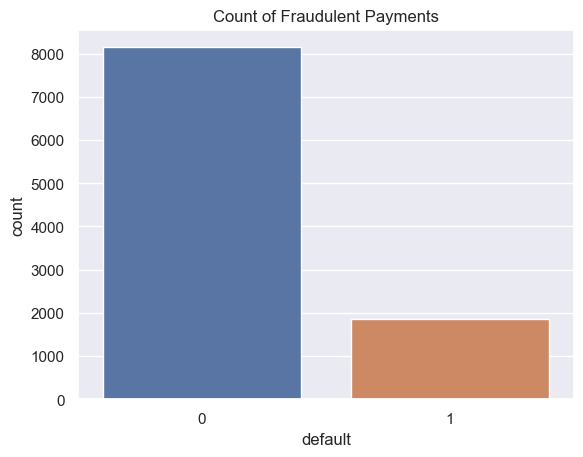

Number of normal examples:  8149
Number of fradulent examples:  1851


In [8]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = data.loc[data['default'] == 1] 
df_non_fraud = data.loc[data['default'] == 0]

sns.countplot(x="default",data=data)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",df_non_fraud.default.count())
print("Number of fradulent examples: ",df_fraud.default.count())

In [9]:
data.groupby('years_employed')[['loan_amt_outstanding','total_debt_outstanding','income', 'fico_score']].mean()

loan_amt_outstanding  total_debt_outstanding        income  \
years_employed                                                               
0                        4659.681572            14176.321909  67633.386003   
1                        4658.612808            13606.051548  71382.026609   
2                        4548.122434            10225.035812  70504.444278   
3                        4377.788884            10146.232572  69724.314201   
4                        4266.358479             9103.234532  70163.845025   
5                        4079.695445             8005.944191  70116.519949   
6                        3913.267816             7363.013223  69235.523576   
7                        3853.935981             7267.437647  70801.053601   
8                        3702.545458             7868.041891  71282.163580   
9                        3765.281520             7608.307502  74008.684770   
10                       3042.684203             9006.955532  66387.171349   

                fico_score  
years_employed              
0               589.562500  
1               594.310976  
2               621.517442  
3               617.657969  
4               631.572779  
5               645.635198  
6               647.304790  
7               666.170181  
8               671.290909  
9               666.906977  
10              710.727273

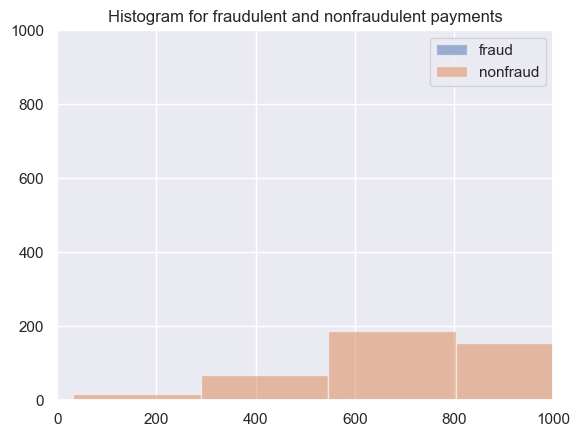

In [10]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.total_debt_outstanding, alpha=0.5, label='fraud',bins=100)
plt.hist(df_non_fraud.total_debt_outstanding, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,1000)
plt.xlim(0,1000)
plt.legend()
plt.show()

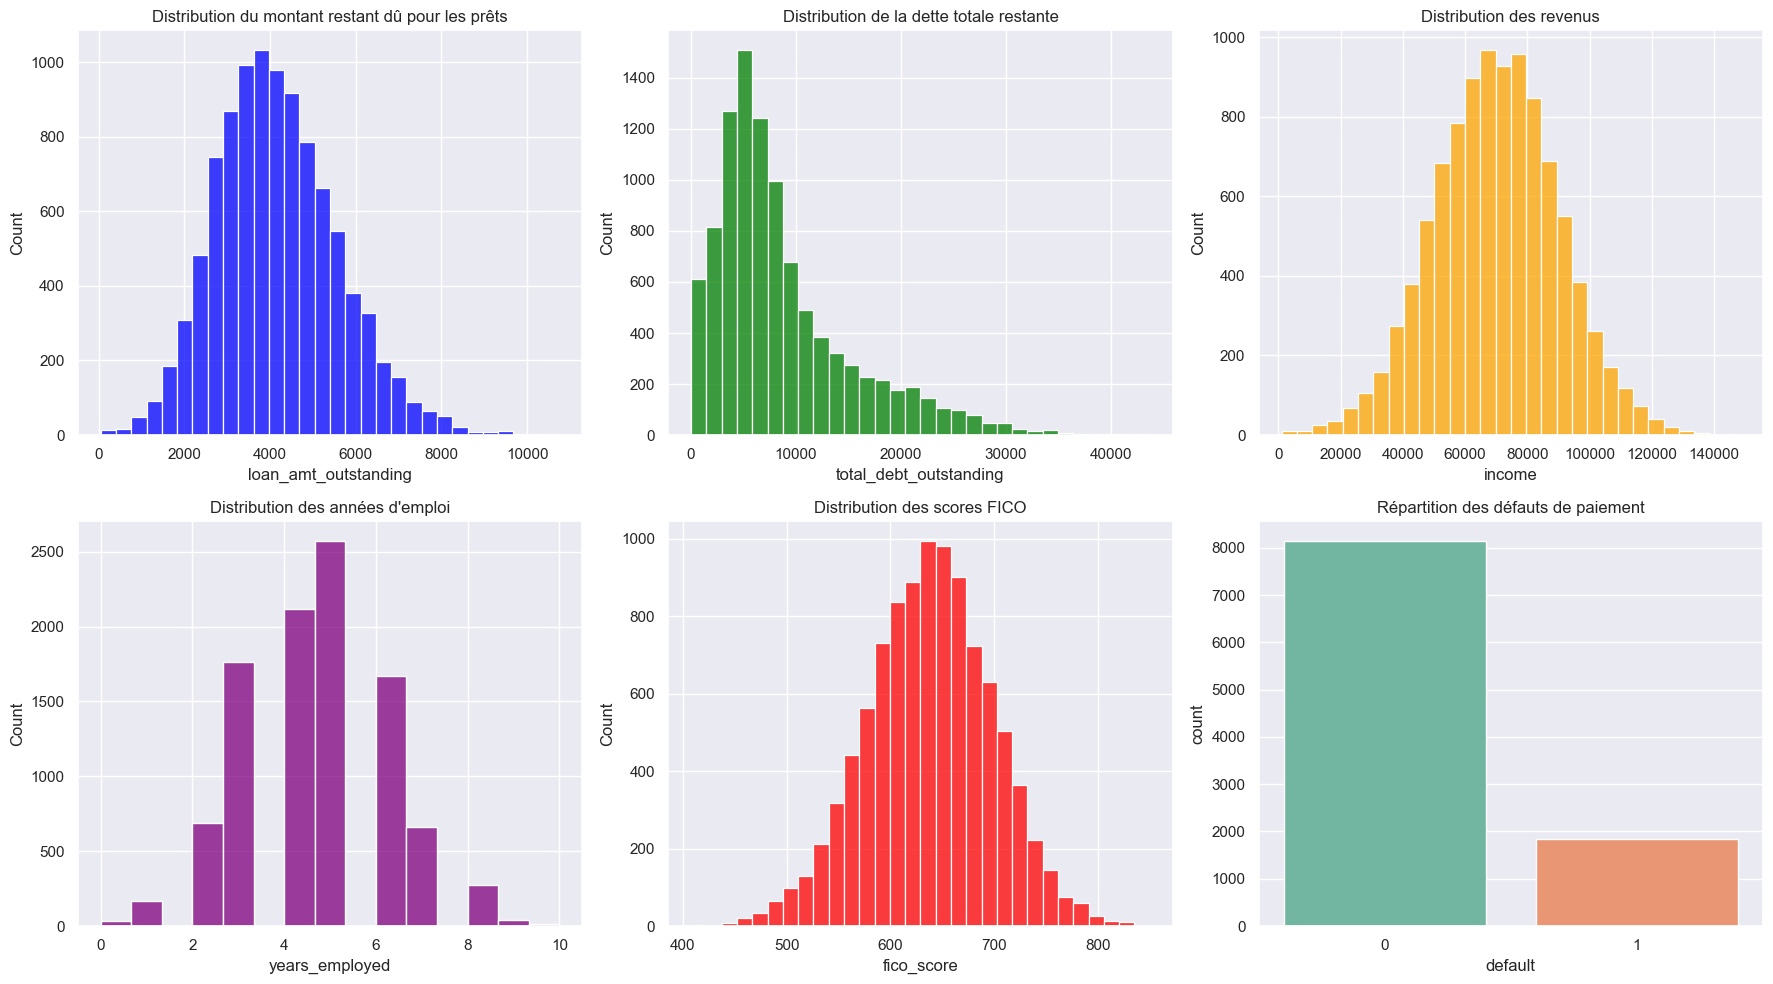

In [11]:
# 2. Visualisation des distributions
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Distribution du montant restant dû pour les prêts
sns.histplot(data['loan_amt_outstanding'], bins=30, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Distribution du montant restant dû pour les prêts')

# Distribution de la dette totale restante
sns.histplot(data['total_debt_outstanding'], bins=30, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Distribution de la dette totale restante')

# Distribution des revenus
sns.histplot(data['income'], bins=30, ax=axs[0, 2], color='orange')
axs[0, 2].set_title('Distribution des revenus')

# Distribution des années d'emploi
sns.histplot(data['years_employed'], bins=15, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Distribution des années d\'emploi')

# Distribution des scores FICO
sns.histplot(data['fico_score'], bins=30, ax=axs[1, 1], color='red')
axs[1, 1].set_title('Distribution des scores FICO')

# Distribution des défauts de paiement
sns.countplot(x='default', data=data, ax=axs[1, 2], palette="Set2")
axs[1, 2].set_title('Répartition des défauts de paiement')

plt.tight_layout()

### 2 -Preprocessing

In [12]:
from scipy.stats import skew

# Calcul de l'asymétrie (skewness)
skewness = skew(data['total_debt_outstanding'])
print("L'asymétrie de 'total_debt_outstanding' est :", skewness)


L'asymétrie de 'total_debt_outstanding' est : 1.4138334239730668


### 3- Modèle

In [13]:
# Séparation des features et de la cible
X = data.drop(['default','customer_id'], axis=1)  # Remplacez 'target_column' par le nom de votre colonne cible
y = data['default']

In [14]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### a- Regression Logistique

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [16]:
from sklearn.linear_model import LogisticRegression
import mlflow
# Définition d'une expérience (Une expérience peut contenir plusieurs *runs*)
mlflow.set_experiment("Reg_Logistic_Models")
mlflow.sklearn.autolog() # Ici on fait appel à l'API MLflow qui intégre les algos de Scikit-Learn.
                        # C'est grâce à ce code qu'on enregistre toutes les métriques et métadonnées de cette expérience (Module MLflow Tracking)
with mlflow.start_run(run_name = 'reg_logistic_defaut'):
  clf = LogisticRegression()
  clf.fit(X_train, y_train)
     

2024/09/09 22:26:44 INFO mlflow.tracking.fluent: Experiment with name 'Reg_Logistic_Models' does not exist. Creating a new experiment.
2024/09/09 22:26:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\nar6d\Desktop\MLOps\Model\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/

In [17]:
# Création d'un second run dans la même expérience
with mlflow.start_run(run_name = 'reg_logistic_max_iter_200'):
  clf2 = LogisticRegression(max_iter=200)
  clf2.fit(X_train, y_train)
     

2024/09/09 22:26:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\nar6d\Desktop\MLOps\Model\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/09 22:26:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\nar6d\Desktop\MLOps\Model\venv\

In [19]:
# Création d'une seconde expérience
seed = 123
mlflow.set_experiment("Decision_Tree_Models")
mlflow.sklearn.autolog()
from sklearn.tree import DecisionTreeClassifier
with mlflow.start_run(run_name = 'decision_tree_defaut'):
  dt1 = DecisionTreeClassifier(random_state=seed)
  dt1.fit(X_train, y_train)

2024/09/09 22:27:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\nar6d\Desktop\MLOps\Model\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/09 22:27:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\nar6d\Desktop\MLOps\Model\venv\

In [20]:
with mlflow.start_run(run_name = 'decision_tree_max_depth3'):
  dt2 = DecisionTreeClassifier(random_state=seed, max_depth=3)
  dt2.fit(X_train, y_train)
     

2024/09/09 22:27:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\nar6d\Desktop\MLOps\Model\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/09 22:27:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\nar6d\Desktop\MLOps\Model\venv\

In [21]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2lqgUy1otbgPjCYpICC8aipC4MV_83m8btHVL6YzrKUpDuiKi" 
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://60e5-86-218-78-102.ngrok-free.app                                       


t=2024-09-09T22:50:20+0200 lvl=warn msg="failed to open private leg" id=5c28ac6a4531 privaddr=localhost:5000 err="dial tcp [::1]:5000: connectex: Aucune connexion nâ€™a pu Ãªtre Ã©tablie car lâ€™ordinateur cible lâ€™a expressÃ©ment refusÃ©e."
t=2024-09-09T22:50:21+0200 lvl=warn msg="failed to open private leg" id=9b6459ab608e privaddr=localhost:5000 err="dial tcp [::1]:5000: connectex: Aucune connexion nâ€™a pu Ãªtre Ã©tablie car lâ€™ordinateur cible lâ€™a expressÃ©ment refusÃ©e."
t=2024-09-09T22:51:19+0200 lvl=warn msg="failed to open private leg" id=71cd97a064d0 privaddr=localhost:5000 err="dial tcp [::1]:5000: connectex: Aucune connexion nâ€™a pu Ãªtre Ã©tablie car lâ€™ordinateur cible lâ€™a expressÃ©ment refusÃ©e."
t=2024-09-09T22:51:19+0200 lvl=warn msg="failed to open private leg" id=6f750aaf1cdb privaddr=localhost:5000 err="dial tcp [::1]:5000: connectex: Aucune connexion nâ€™a pu Ãªtre Ã©tablie car lâ€™ordinateur cible lâ€™a expressÃ©ment refusÃ©e."


In [23]:

!mlflow ui

^C
